Chapter 18

# Riemann和
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码使用 Riemann 和方法来近似计算函数

$$
f(x) = x^2
$$

在区间 $[a, b]$ 上的定积分。Riemann 和是一种将积分区域划分为小矩形的方式，通过矩形面积的累加来近似积分值。代码实现了三种 Riemann 和：

1. **左 Riemann 和**：在每个子区间的左端点处计算函数值，将这些值乘以子区间宽度 $\Delta x$ 并累加，给出总和

   $$
   S_{\text{left}} = \sum_{i=0}^{N-1} f(x_i) \cdot \Delta x
   $$

2. **中点 Riemann 和**：在每个子区间的中点处计算函数值，并乘以 $\Delta x$，得到近似的积分总和

   $$
   S_{\text{mid}} = \sum_{i=0}^{N-1} f\left(\frac{x_i + x_{i+1}}{2}\right) \cdot \Delta x
   $$

3. **右 Riemann 和**：在每个子区间的右端点处计算函数值并乘以 $\Delta x$，形成和

   $$
   S_{\text{right}} = \sum_{i=1}^{N} f(x_i) \cdot \Delta x
   $$

代码分别计算了这三种 Riemann 和，并将其与定积分的真实值进行对比。通过绘制不同端点的矩形，该代码以直观的方式展示了 Riemann 和近似方法的效果，显示了每种方法在逼近积分值方面的差异。随着分区数量 $N$ 的增加，各种 Riemann 和都会更精确地逼近真实的定积分值。

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *  # 导入符号计算库

In [2]:
x = Symbol('x')  # 定义符号变量 x

## 定义被积函数

In [3]:
f_x = x**2  # 定义函数 f(x) = x^2
# f_x = x**2 + x + 1  # 可选函数 f(x) = x^2 + x + 1
# f_x = exp(-x**2)  # 可选函数 f(x) = exp(-x^2)
f_x

x**2

In [4]:
f_x_fcn = lambdify([x], f_x)  # 将符号函数转换为数值函数

## 计算不定积分和定积分

In [5]:
integral_f_x = integrate(f_x, x)  # 计算 f(x) 的不定积分
integral_f_x

x**3/3

In [6]:
integral_f_x_fcn = lambdify([x], integral_f_x)  # 将不定积分转换为数值函数

In [7]:
a = 0  # 积分下限
b = 1  # 积分上限

In [8]:
integral_a_b = integral_f_x_fcn(b) - integral_f_x_fcn(a)  # 使用不定积分计算定积分值
integral_a_b

0.3333333333333333

In [9]:
integral_a_b_v2 = integrate(f_x, (x, a, b))  # 使用定积分公式计算积分值
integral_a_b_v2 = float(integral_a_b_v2)  # 将结果转换为浮点数

print(r'$\int_a^b  f(x)dx = %0.3f$' % integral_a_b)  # 输出定积分结果

$\int_a^b  f(x)dx = 0.333$


## 可视化 Riemann 和积分曲线

In [10]:
num_interval = 20  # 将区间划分为 20 个小区间
delta_x = (b - a) / num_interval  # 每个小区间的宽度

x_array = np.linspace(a, b, num_interval + 1)  # 在积分区间内定义 x 的取值
y_array = f_x_fcn(x_array)  # 计算每个 x 对应的函数值

x_array_fine = np.linspace(a, b, 200)  # 定义更细的 x 取值范围，用于绘制平滑曲线
y_array_fine = f_x_fcn(x_array_fine)  # 计算平滑曲线上的函数值

## 左 Riemann 和

Text(0, 0.5, 'f(x)')

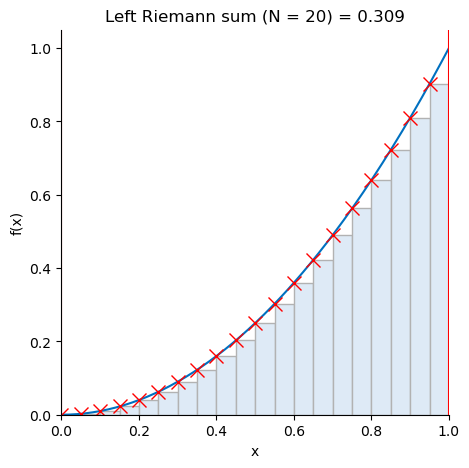

In [11]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x_array_fine, y_array_fine,
         color='#0070C0')  # 绘制平滑曲线

x_left = x_array[:-1]  # 使用左端点
y_left = y_array[:-1]

plt.plot(x_left, y_left, 'rx', markersize=10)  # 标记左端点

plt.bar(x_left, y_left,
        width=delta_x,
        facecolor='#DEEAF6',
        align='edge',
        edgecolor='#B2B2B2')  # 绘制矩形表示左 Riemann 和

ax.axvline(x=a, color='r', linestyle='-')  # 绘制积分下限
ax.axvline(x=b, color='r', linestyle='-')  # 绘制积分上限

left_riemann_sum = np.sum(f_x_fcn(x_left) * delta_x)  # 计算左 Riemann 和

plt.title('Left Riemann sum (N = %0.0f) = %0.3f'
          % (num_interval, left_riemann_sum))  # 显示左 Riemann 和的结果
plt.xlim((a, b))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('x')
plt.ylabel('f(x)')

## 中点 Riemann 和

Text(0, 0.5, 'f(x)')

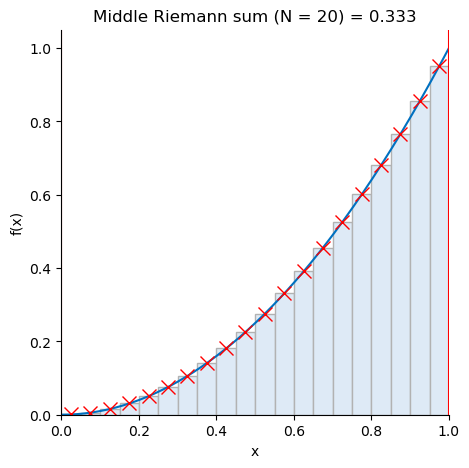

In [12]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x_array_fine, y_array_fine,
         color='#0070C0')  # 绘制平滑曲线

x_mid = (x_array[:-1] + x_array[1:]) / 2  # 使用区间的中点
y_mid = f_x_fcn(x_mid)

plt.plot(x_mid, y_mid, 'rx', markersize=10)  # 标记中点

plt.bar(x_mid, y_mid,
        width=delta_x,
        facecolor='#DEEAF6',
        edgecolor='#B2B2B2')  # 绘制矩形表示中点 Riemann 和

ax.axvline(x=a, color='r', linestyle='-')
ax.axvline(x=b, color='r', linestyle='-')

mid_riemann_sum = np.sum(f_x_fcn(x_mid) * delta_x)  # 计算中点 Riemann 和

plt.title('Middle Riemann sum (N = %0.0f) = %0.3f'
          % (num_interval, mid_riemann_sum))  # 显示中点 Riemann 和的结果
plt.xlim((a, b))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('x')
plt.ylabel('f(x)')

## 右 Riemann 和

Text(0, 0.5, 'f(x)')

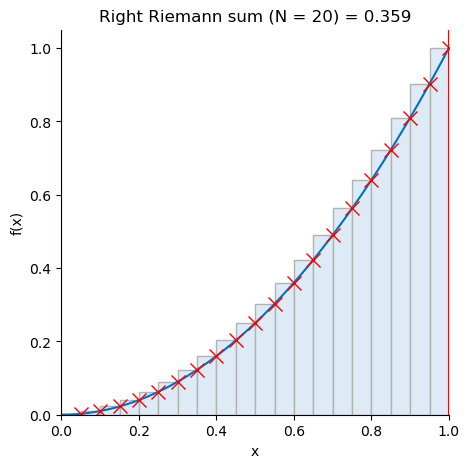

In [13]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x_array_fine, y_array_fine,
         color='#0070C0')  # 绘制平滑曲线

x_right = x_array[1:]  # 使用右端点
y_right = f_x_fcn(x_right)

plt.plot(x_right, y_right, 'rx', markersize=10)  # 标记右端点

plt.bar(x_right, y_right,
        width=-delta_x,
        facecolor='#DEEAF6',
        align='edge',
        edgecolor='#B2B2B2')  # 绘制矩形表示右 Riemann 和

ax.axvline(x=a, color='r', linestyle='-')
ax.axvline(x=b, color='r', linestyle='-')

right_riemann_sum = np.sum(f_x_fcn(x_right) * delta_x)  # 计算右 Riemann 和

plt.title('Right Riemann sum (N = %0.0f) = %0.3f'
          % (num_interval, right_riemann_sum))  # 显示右 Riemann 和的结果
plt.xlim((a, b))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('x')
plt.ylabel('f(x)')